In [1]:
from network import Generator, Discriminator, weight_init
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from DataLoading import mnistLoader

In [2]:
data_loader = mnistLoader()
train_loader, val_loader = data_loader.train_val_loader(16, 16, shuffle=True, split = 0.8, ratio = 1)
test_loader = data_loader.test_loader(16, shuffle=False, ratio = 1)

In [32]:
iterator = enumerate(train_loader, 0)

i, batch = iterator.__next__()
new_loader = [batch]
it2 = enumerate(new_loader, 0)
i, batch2 = it2.__next__()
print(i)
print(batch2)
x, _ = batch2
x = [x]
x.append(torch.randn(16))
print(x)



0
[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1

In [3]:
def visualize(x):

    x = x.clone().detach()
    fig = plt.figure(figsize=(10,7))
    for i in range(x.shape[0]):
        fig.add_subplot(3,int(x.shape[0]/3) + 1, i+1)
        image = torch.squeeze(x[i]).numpy() 
        plt.imshow(image)
        plt.axis('off')

    plt.show()

In [4]:
inp = torch.randn(3, 1, 28, 28)
dd = Discriminator(1, 32)
dd(inp).shape

torch.Size([3])

In [6]:
BATCH_SIZE = 16
nzd, ngf, ndf = 64, 64, 64
MAX_EPOCHS = 5
real_labels = torch.ones(BATCH_SIZE)
fake_labels = torch.zeros(BATCH_SIZE)

test_set = torch.randn(16, nzd, 1, 1)

In [7]:
netD = Discriminator(1, ndf)
netG = Generator(nzd, ngf, 1)
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"
netD.to(device)
netG.to(device)
netD.apply(weight_init)
netG.apply(weight_init)
num_epochs = 10
loss_fn = nn.BCELoss()
optimizerG = optim.Adam(netG.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr =0.001,  betas=(0.5, 0.999))


epoch: 0, iter: 0, Loss_D: 8.59433650970459, Loss_G: 8.16582202911377, 
 test_set: 0.4940933287143707


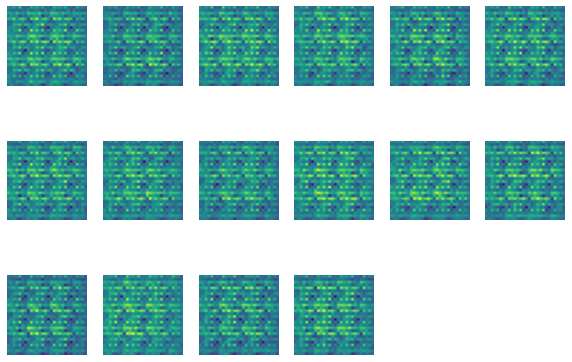

epoch: 0, iter: 50, Loss_D: 2.103196382522583, Loss_G: 8.821393966674805, 
 test_set: 8.916029401007108e-06


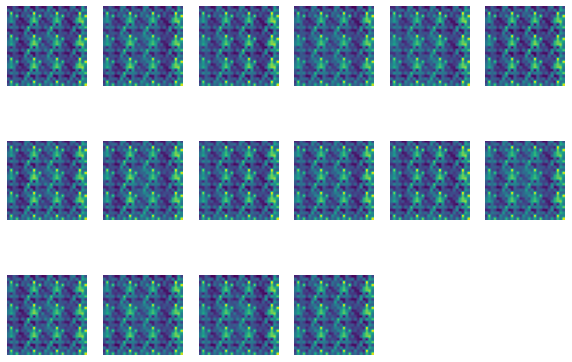

epoch: 0, iter: 100, Loss_D: 0.5166913270950317, Loss_G: 5.209961891174316, 
 test_set: 0.09611097723245621


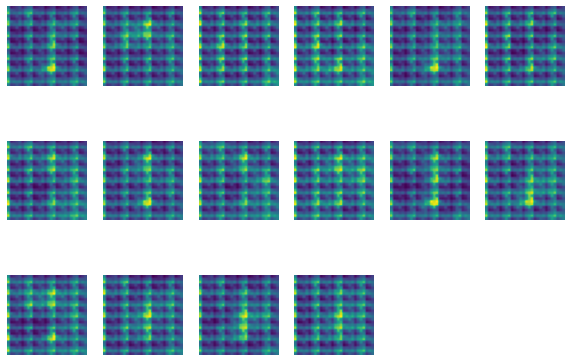

epoch: 0, iter: 150, Loss_D: 1.0994328260421753, Loss_G: 3.386697292327881, 
 test_set: 0.3324335813522339


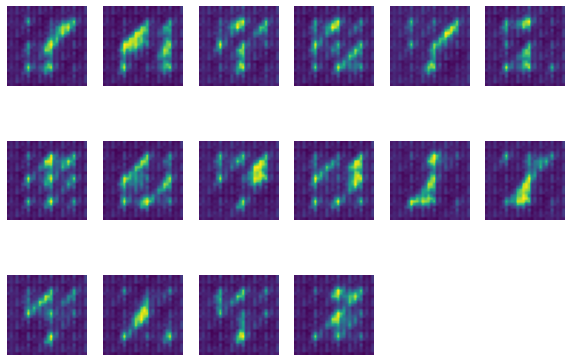

epoch: 0, iter: 200, Loss_D: 0.9610464572906494, Loss_G: 2.9385600090026855, 
 test_set: 0.22846701741218567


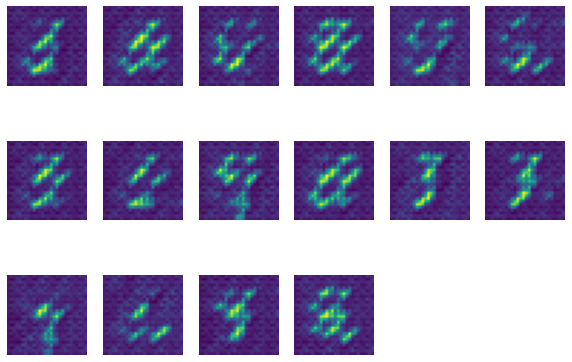

In [9]:
for epoch in range(num_epochs):

    for i, data in enumerate(train_loader, 0):
        real_img, _ = data
        netD.zero_grad()
        output_real = netD(real_img)
        errD_real = loss_fn(output_real, real_labels)
        errD_real.backward()

        D_x = output_real.mean().item()


        noise = torch.randn(BATCH_SIZE, nzd, 1, 1)
        fake_img = netG(noise)
        output_fake = netD(fake_img.detach())
        errD_fake = loss_fn(output_fake, fake_labels)

        D_G_z1 = output_fake.mean().item()

        errD_fake.backward()
        errD = errD_fake + errD_real
        optimizerD.step()

        ###############################

        netG.zero_grad()
        output_fake = netD(fake_img)
        errG = loss_fn(output_fake, real_labels)

        D_G_z2 = output_fake.mean().item()
        errG.backward()
        optimizerG.step()

        ###############################

        if i%50 == 0:
            netG.eval()
            netD.eval()
            with torch.no_grad():
                img_fake = netG(test_set)
                output_fake = netD(img_fake).mean().item()
                print(f'epoch: {epoch}, iter: {i}, Loss_D: {errD.item()}, Loss_G: {errG.item()}, \n test_set: {output_fake}')
                visualize(img_fake)
            netG.train()
            netD.train()
    



